<a href="https://colab.research.google.com/github/YMGYM/Cats_Dogs_Classification/blob/master/Cats_and_Dogs_Practice2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 구글 드라이브 마운트

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
! unzip drive/My\ Drive/Datasets/cats-and-dogs.zip -d data

# 텐서플로우 설치 및 임포트

In [1]:
!pip install tensorflow==2.0.0

     |████████████████████████████████| 86.3MB 36kB/s 
     |████████████████████████████████| 3.8MB 46.2MB/s 
     |████████████████████████████████| 450kB 55.6MB/s 
     |████████████████████████████████| 81kB 12.7MB/s 
ERROR: tensorboard 2.0.2 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.11.0 which is incompatible.
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled google-auth-1.4.2
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstall

In [0]:
import tensorflow as tf
from tensorflow import keras as keras

In [3]:
tf.__version__

'2.0.0'

# 학습 데이터 경로

In [0]:
import pathlib

In [4]:
data_dir = pathlib.Path('data/cats_and_dogs/')

train_data_dir = pathlib.Path(str(data_dir) + '/training/')
dataset_number = len(list(train_data_dir.glob('*/*')))

print(dataset_number)

20000


In [0]:
import numpy as np
CLASS_NAME = np.array([item.name for item in train_data_dir.glob('*')])

In [11]:
CLASS_NAME

array(['dogs', 'cats'], dtype='<U4')

# 이미지 Generator 생성

In [0]:
image_generator = keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.0,  rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, validation_split= 0.1 ,horizontal_flip=True)

# 하이퍼파라미터 설정

In [0]:
import numpy as np

BATCH_SIZE = 50
IMG_WIDTH = 100
IMG_HEIGHT = 100
SETPS_PER_EPOCH = np.ceil(dataset_number/BATCH_SIZE)

# 학습 배치 데이터 Generator 생성

In [14]:
import os
generated_train_data = image_generator.flow_from_directory(directory=train_data_dir, target_size=(IMG_HEIGHT,IMG_WIDTH), classes=['dogs', 'cats'], batch_size=BATCH_SIZE, shuffle=True )
generated_validation_data = image_generator.flow_from_directory(directory='/content/data/cats_and_dogs/validation', target_size=(IMG_HEIGHT,IMG_WIDTH), classes=['dogs', 'cats'],batch_size=BATCH_SIZE)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


# 배치 데이터 확인

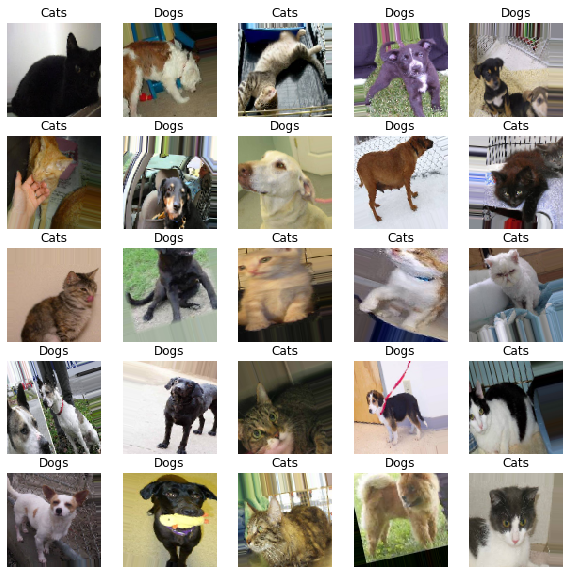

In [15]:
import matplotlib.pyplot as plt

def show_batch(image_batch, label_batch):
    plt.figure(figsize=(10,10))
    for n in range(25):
      ax = plt.subplot(5,5,n+1)
      plt.imshow(image_batch[n])
      plt.title(CLASS_NAME[label_batch[n]==1][0].title())
      plt.axis('off')

image_batch, label_batch = next(generated_train_data)
show_batch(image_batch,label_batch)

# 모델 생성

In [0]:
from tensorflow.keras import layers, models

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(filters=25, kernel_size = (6,6), activation="relu", input_shape=(100,100,3)))
model.add(layers.MaxPool2D())
model.add(layers.Conv2D(filters=64, kernel_size = (6,6), activation="relu"))
model.add(layers.Conv2D(filters=64, kernel_size = (3,3), activation="relu"))
model.add(layers.Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model.add(layers.MaxPool2D())
model.add(layers.Flatten())
model.add(layers.Dense(50, activation="relu"))
model.add(layers.Dense(2, activation="softmax"))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 95, 95, 6)         654       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 47, 47, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 42, 42, 25)        5425      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 40, 40, 25)        5650      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 38, 38, 36)        8136      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 19, 19, 36)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12996)             0

In [0]:
model.compile(optimizer="adam", loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])

# 모델 로드

In [0]:
model = tf.keras.models.load_model('/content/drive/My Drive/trained_model/catsAndDogs')

In [66]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath='/content/drive/My Drive/trained_model/catsAndDogs',
        monitor='val_loss',
        save_best_only=True,
        verbose=1)
]

model.fit(generated_train_data, callbacks=callbacks, epochs=10, validation_data=generated_validation_data, shuffle=True)

Train for 400 steps, validate for 100 steps
Epoch 1/10
399/400 [============================>.] - ETA: 0s - loss: 0.2845 - accuracy: 0.8789
Epoch 00001: val_loss improved from inf to 0.31719, saving model to /content/drive/My Drive/trained_model/catsAndDogs
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: /content/drive/My Drive/trained_model/catsAndDogs/assets
400/400 [==============================] - 439s 1s/step - loss: 0.2844 - accuracy: 0.8789 - val_loss: 0.3172 - val_accuracy: 0.8606
Epoch 2/10
399/400 [============================>.] - ETA: 0s - loss: 0.2793 - accuracy: 0.8781
Epoch 00002: val_loss did not improve from 0.31719
400/400 [==============================] - 443s 1s/step - loss: 0.2794 - accuracy: 0.8780 - val_loss: 0.3424 - val_accuracy: 0.8522
Epoch 3/10
399/400 [============================>.] - ETA: 0s - loss: 0.2892 - accuracy: 0.8763
Epoch 00003: val_loss did not improve from 0.31719
400/400 [==

# 모델 평가

In [0]:
!unzip /content/drive/My\ Drive/Datasets/cat-and-dog_mini.zip -d data

다운받은 데이터셋의 test 데이터는 class가 한 개 뿐이라 정확한 정확도가 나오지 않았기에 다른 데이터셋에서 테스트 파일만을 사용했다.

In [73]:
test_data_generator = image_generator.flow_from_directory(directory='/content/data/test_set/test_set', target_size=(IMG_HEIGHT,IMG_WIDTH), classes=['dogs', 'cats'], batch_size=1)

Found 2023 images belonging to 2 classes.


[1. 0.]


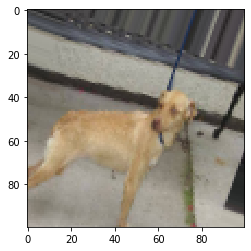

In [74]:
test_img, test_label = next(test_data_generator)
print(test_label[0])
plt.imshow(test_img[0])

test_data_generator로 생성된 데이터들의 label이다.
강아지인 경우 index 0이 1이고, 고양이인경우 index 1이 1로 표시된다.

In [75]:
model.evaluate(test_data_generator)

2023/2023 [==============================] - 28s 14ms/step - loss: 0.2871 - accuracy: 0.8735


[0.28708232556914826, 0.8734553]

# 이미지 예측

In [0]:
import cv2

im = cv2.imread("/content/check2.jpg").astype(np.float32) # 이미지 로드
im = im * (1.0/255.0) # 이미지 정규화
resized_img = cv2.resize(im, (100,100)) # 이미지 크기를 맞게 변형
rgb_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB)
expdim_img = np.expand_dims(rgb_img, axis=0) # 배치는 1개


In [106]:
predict = model.predict(expdim_img)
predict

array([[0.8908186 , 0.10918144]], dtype=float32)

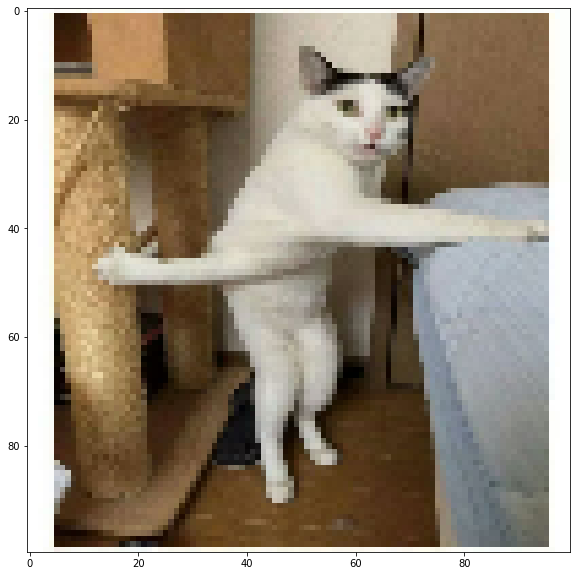

이 사진은 89.08185958862305% 확률로 강아지 입니다.


In [107]:
import matplotlib.pyplot as plt

classes = ["강아지","고양이"]
plt.figure(figsize=(10,10))
plt.imshow(rgb_img)
plt.show()

print("이 사진은 {}% 확률로 {} 입니다.".format(predict[0][np.argmax(predict)] * 100, classes[np.argmax(predict)] ))